#Real Estate Property Analysis:-

#Problem Statements:-

/tmp/ipython-input-7-3316061778.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_prices.values, y=city_prices.index, palette="Blues_d")


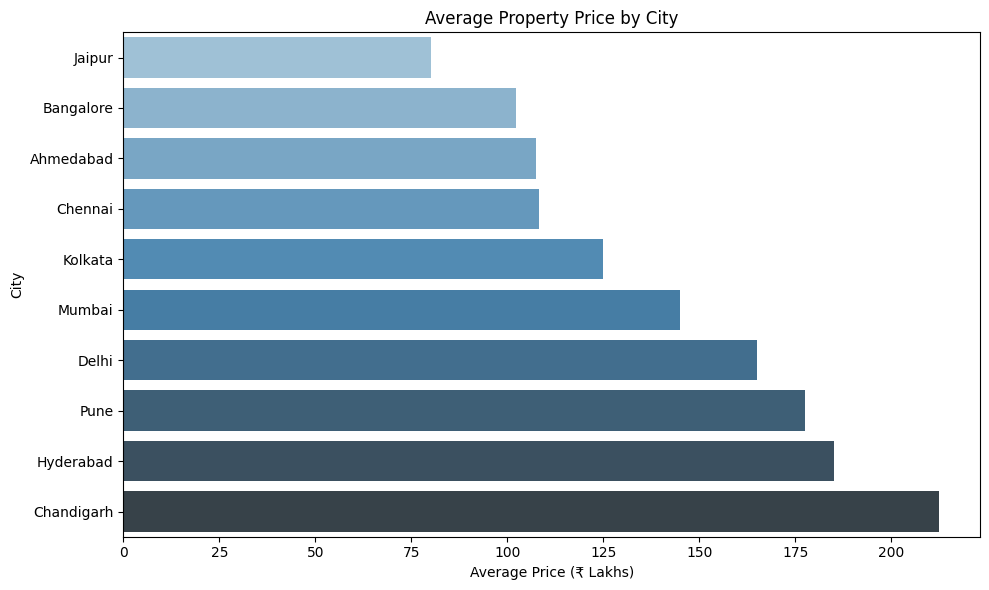

In [7]:
# Install necessary libraries
!pip install openpyxl seaborn --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/content/Real_Estate_Dataset.xlsx')  # Ensure the file name matches what you uploaded

# Display first few rows
df.head()

plt.figure(figsize=(10, 6))
city_prices = df.groupby("City")["Price (₹ Lakhs)"].mean().sort_values()
sns.barplot(x=city_prices.values, y=city_prices.index, palette="Blues_d")
plt.title('Average Property Price by City')
plt.xlabel('Average Price (₹ Lakhs)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

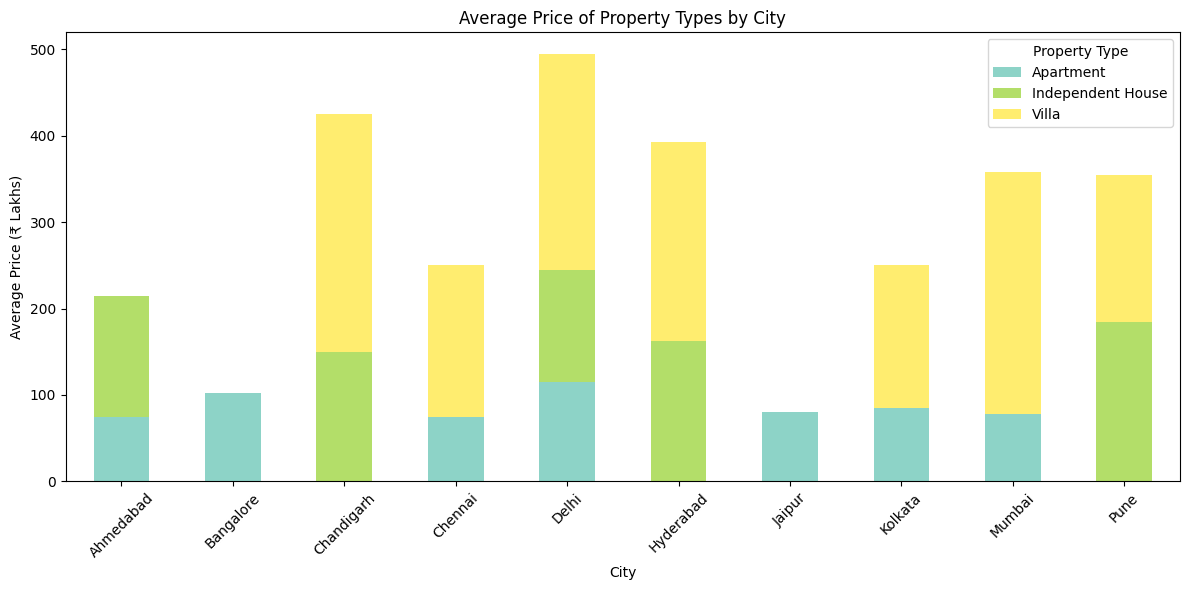

In [9]:
#Task 2: Compare Average Price for Each Property TypP
#Goal: Create a Stacked Bar Chart showing the average price of different property types.

plt.figure(figsize=(10, 6))
prop_price = df.groupby(["City", "Property Type"])["Price (₹ Lakhs)"].mean().unstack()
prop_price.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Average Price of Property Types by City')
plt.ylabel('Average Price (₹ Lakhs)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
#Task 3: Identify the Top 3 Most Expensive PropertieG
#Goal: Find the three highest-priced properties.

top3 = df.nlargest(3, "Price (₹ Lakhs)")
top3[["Property ID", "City", "Property Type", "Price (₹ Lakhs)", "Area (Sq. Ft)", "Status"]]

,Property ID,City,Property Type,Price (₹ Lakhs),Area (Sq. Ft),Status
20,121,Mumbai,Villa,280,3300,Sold
9,110,Chandigarh,Villa,275,3200,Available
1,102,Delhi,Villa,250,2500,Sold


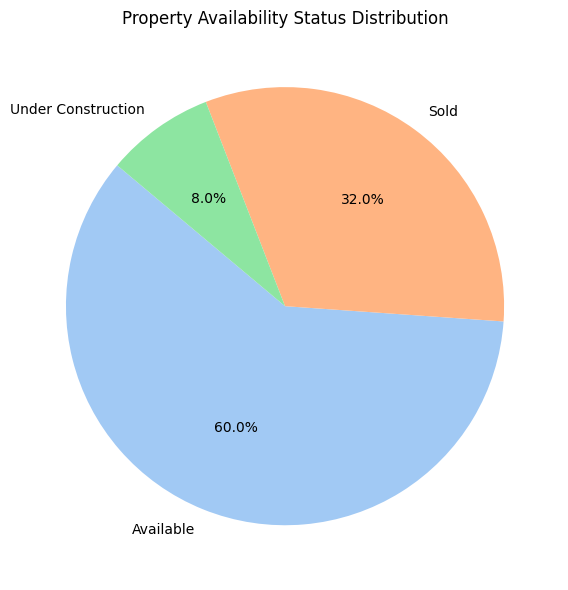

In [11]:
# Task 4: Show the Percentage of Properties Sold vs. AvailablP
# Goal: Use a Pie Chart to compare Sold, Available, and Under Construction properties.

plt.figure(figsize=(8, 6))
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Property Availability Status Distribution')
plt.tight_layout()
plt.show()

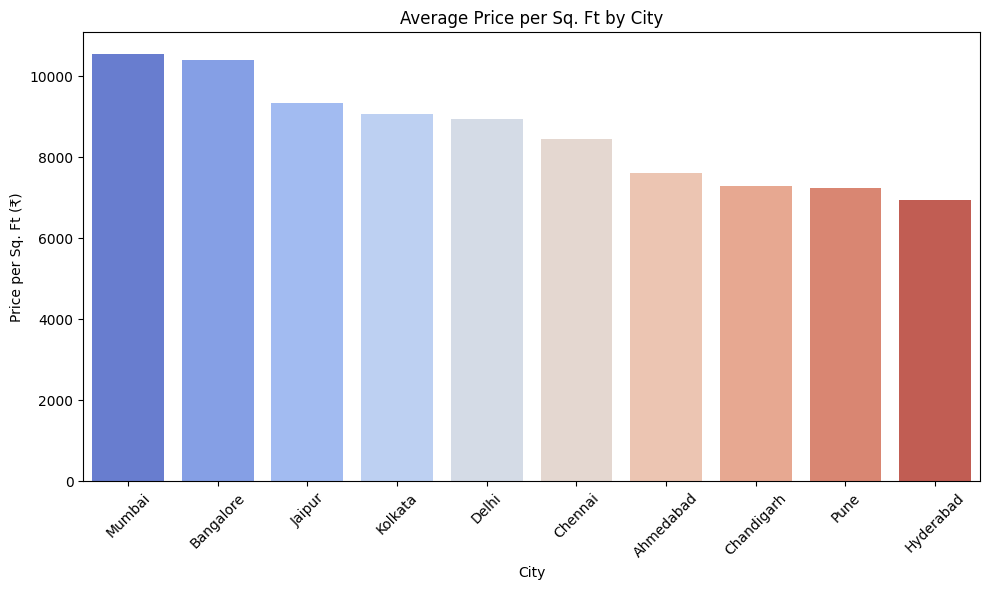

In [12]:
#Task 5: Price Per Sq. Ft Analysis by City
#Goal: Calculate the average price per square foot for each city to compare real estate value.
#Visualization: Bar Chart showing average price per sq. ft. by city.

df['Price_per_SqFt'] = df['Price (₹ Lakhs)'] * 100000 / df['Area (Sq. Ft)']
avg_ppsf = df.groupby('City')['Price_per_SqFt'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_ppsf.index, y=avg_ppsf.values, palette="coolwarm")
plt.title('Average Price per Sq. Ft by City')
plt.ylabel('Price per Sq. Ft (₹)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

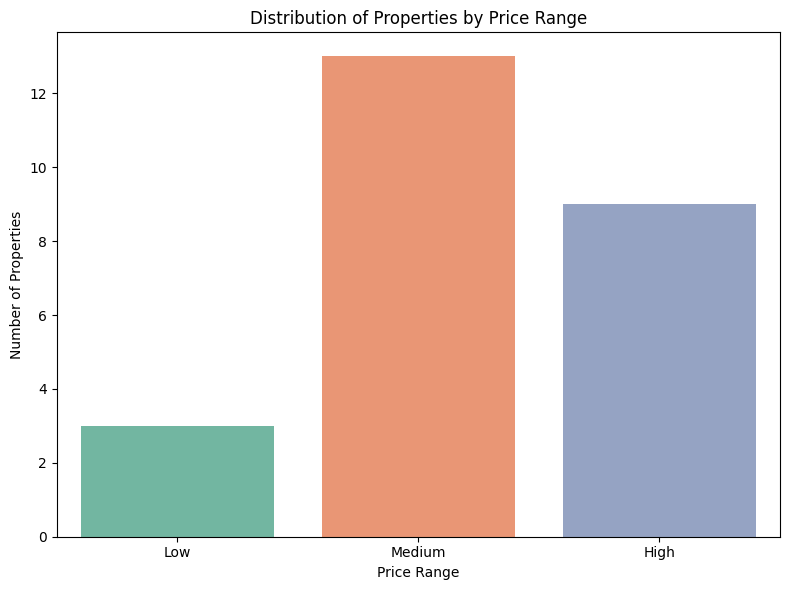

In [13]:
#Task 6: Group Properties by Price Range and Analyze Count
#Goal: Categorize properties into Low, Medium, and High price ranges and analyze how many fall into each.
#Visualization : Bar Chart showing how properties are distributed across different price bands.

def categorize_price(price):
    if price < 75:
        return "Low"
    elif price <= 150:
        return "Medium"
    else:
        return "High"

df["Price Range"] = df["Price (₹ Lakhs)"].apply(categorize_price)
range_counts = df["Price Range"].value_counts().reindex(["Low", "Medium", "High"])

plt.figure(figsize=(8, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette="Set2")
plt.title('Distribution of Properties by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()